# Cleaning the merged data:

In this notebook, we explore the merged data and attempt to clean the data prior to modeling.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('merged_sales_pluto_data.csv', index_col=None)

In [3]:
pd.set_option('display.max_columns', 500)
df.head()

,ADDRESS,APARTMENT NUMBER,Address,AssessLand,AssessTot,BLOCK,BOROUGH,BUILDING CLASS AT PRESENT,BUILDING CLASS AT TIME OF SALE,BUILDING CLASS CATEGORY,BldgArea,Block,Borough,COMMERCIAL UNITS,CT2010,CondoNo,EASE-MENT,GROSS SQUARE FEET,LAND SQUARE FEET,LOT,Lot,LotArea,NEIGHBORHOOD,NumBldgs,NumFloors,Pluto_BBL,PolicePrct,RESIDENTIAL UNITS,ResArea,SALE DATE,SALE PRICE,SchoolDist,TAX CLASS AT PRESENT,TAX CLASS AT TIME OF SALE,TOTAL UNITS,YEAR BUILT,YearAlter1,YearAlter2,YearBuilt,ZIP CODE,ZipCode,unit_BBL
0,19-56 81ST STREET,,19-56 81 STREET,8164.0,28531.0,949,4,A5,A5,01 ONE FAMILY HOMES,1224.0,949.0,QN,0,317.00,0.0,,1224,1800,38,38.0,1800.0,AIRPORT LA GUARDIA,1.0,2.0,4.009490e+09,114.0,1,1224.0,2011-10-14,0,30.0,1,1,1,1945,0.0,0.0,1945.0,11370,11370.0,4.009490e+09
1,350 BEACH 40TH STREET,,350 BEACH 40 STREET,6008.0,16808.0,15829,4,A5,A5,01 ONE FAMILY HOMES,1502.0,15829.0,QN,0,992.00,0.0,,1502,2613,34,34.0,2613.0,ARVERNE,1.0,2.0,4.158290e+09,101.0,1,1502.0,2011-03-07,341360,27.0,1,1,1,2008,0.0,0.0,2008.0,11691,11691.0,4.158290e+09
2,317 BEACH 40 STREET,,317 BEACH 40 STREET,1793.0,3788.0,15830,4,A6,A6,01 ONE FAMILY HOMES,608.0,15830.0,QN,0,992.00,0.0,,608,2115,61,61.0,2115.0,ARVERNE,1.0,1.0,4.158300e+09,101.0,1,608.0,2011-03-03,50000,27.0,1,1,1,1920,0.0,0.0,1920.0,11691,11691.0,4.158300e+09
3,335 BEACH 45TH STREET,,335 BEACH 45 STREET,3978.0,9069.0,15837,4,A1,A1,01 ONE FAMILY HOMES,1048.0,15837.0,QN,0,972.04,0.0,,1048,2470,56,56.0,2470.0,ARVERNE,1.0,2.0,4.158370e+09,101.0,1,1048.0,2011-07-06,160000,27.0,1,1,1,1925,0.0,0.0,1925.0,11691,11691.0,4.158370e+09
4,3720 BEACH CHANNEL DRIVE,,37-20 BEACH CHANNEL DRIVE,2877.0,14246.0,15954,4,A5,A5,01 ONE FAMILY HOMES,1502.0,15954.0,QN,0,992.00,0.0,,1502,2080,87,87.0,2080.0,ARVERNE,1.0,2.0,4.159540e+09,101.0,1,1502.0,2011-01-28,434500,27.0,1,1,1,2008,0.0,0.0,2008.0,11691,11691.0,4.159540e+09


## Cleaning Sale Price

Our first approach to cleaning the data will be do drop the records where sale price is low (under the assumption this reflects a deed transfer, not a public sale at market price).

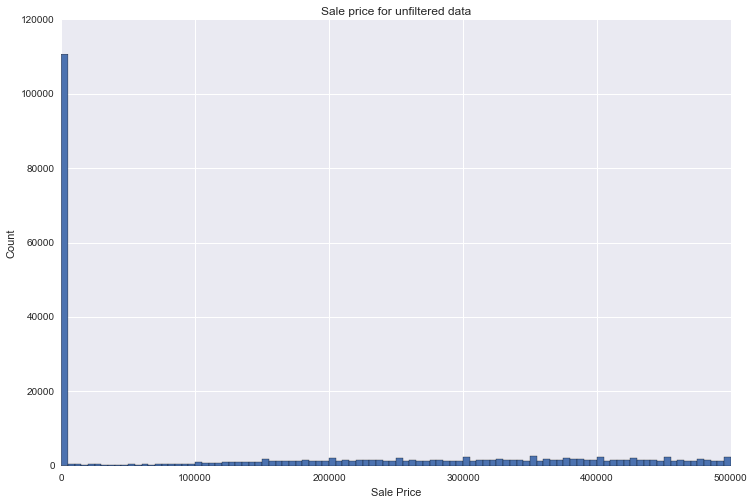

In [7]:
plt.figure(figsize=(12,8))
plt.hist(df.loc[df['SALE PRICE'] < 500000, 'SALE PRICE'].values, bins=100)
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.title('Sale price for unfiltered data')
plt.show()

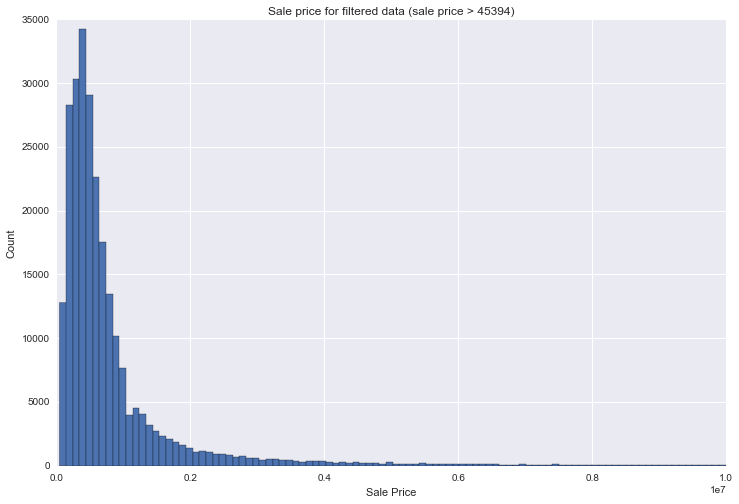

In [10]:
least_reasonable_sale_price = 45394 #Based on street easy scrape

df = df.loc[df['SALE PRICE'] > least_reasonable_sale_price, :].reset_index(drop=True)
plt.figure(figsize=(12,8))
plt.hist(df.loc[df['SALE PRICE'] < 10000000, 'SALE PRICE'].values, bins=100)
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.title('Sale price for filtered data (sale price > 45394)')
plt.show()

In [9]:
df.shape

(256197, 42)

Now let's tackle zip code:

In [12]:
df[['ZIP CODE','ZipCode']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256197 entries, 0 to 256196
Data columns (total 2 columns):
ZIP CODE    256197 non-null int64
ZipCode     255313 non-null float64
dtypes: float64(1), int64(1)
memory usage: 3.9 MB


In [13]:
np.sum(df['ZIP CODE'] == df['ZipCode'])

251581

We drop records where these two fields disagree, since this indicates potential data entry or merge errors.

In [14]:
df = df.loc[~((df['ZIP CODE'] != df['ZipCode']) &
         (~df['ZIP CODE'].isnull()) &
         (~df['ZipCode'].isnull())),:]

In [15]:
df.shape

(252465, 42)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252465 entries, 0 to 256196
Data columns (total 42 columns):
ADDRESS                           252465 non-null object
APARTMENT NUMBER                  252465 non-null object
Address                           251626 non-null object
AssessLand                        251627 non-null float64
AssessTot                         251627 non-null float64
BLOCK                             252465 non-null int64
BOROUGH                           252465 non-null int64
BUILDING CLASS AT PRESENT         252465 non-null object
BUILDING CLASS AT TIME OF SALE    252465 non-null object
BUILDING CLASS CATEGORY           252465 non-null object
BldgArea                          251627 non-null float64
Block                             251627 non-null float64
Borough                           251627 non-null object
COMMERCIAL UNITS                  252465 non-null int64
CT2010                            251601 non-null float64
CondoNo                         

Now note ZipCode is a duplicate feature, which we will drop (note we drop ZipCode since it has null entries where ZIP CODE does not):

In [17]:
df.drop('ZipCode', inplace=True, axis=1)
df.shape

(252465, 41)

Next we deal with YearBuilt, YearAlter1, and YearAlter2. We will construct the following features
- Building age: 2016-YearBuilt
- Number of times altered:
    - 0 if YearAlter1 and YearAlter2 missing,
    - 1 if YearAlter1 has a valid value and YearAlter2 missing
    - 2 if Both non-null
- Years since last altered:
    - 2016 - max(YearBuilt, YearAlter1, YearAlter2)


In [18]:
np.sum(df['YearBuilt'] == df['YEAR BUILT'])

227117

In [19]:
zero_years_replacements = np.max(df.loc[(df['YearBuilt'] == 0) |
                                        (df['YEAR BUILT'] == 0),
                                        ['YearBuilt','YEAR BUILT']], axis=1)

In [20]:
df.loc[(df['YEAR BUILT'] == 0), 'YEAR BUILT'] = zero_years_replacements
df.loc[(df['YEAR BUILT'] == 0), 'YEAR BUILT'] = zero_years_replacements
np.sum(df['YearBuilt'] == df['YEAR BUILT'])

242570

In [21]:
np.sum(df.loc[df['YEAR BUILT'] == 0,['YearBuilt', 'YEAR BUILT']], axis=0)

YearBuilt     0.0
YEAR BUILT    0.0
dtype: float64

In [22]:
df.loc[df['YEAR BUILT'] == 0,:].shape

(1525, 41)

We drop these 1525 records without known building age.

In [23]:
df = df.loc[~(df['YEAR BUILT'] == 0),:]
df.shape

(250940, 41)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250940 entries, 0 to 256196
Data columns (total 41 columns):
ADDRESS                           250940 non-null object
APARTMENT NUMBER                  250940 non-null object
Address                           250334 non-null object
AssessLand                        250335 non-null float64
AssessTot                         250335 non-null float64
BLOCK                             250940 non-null int64
BOROUGH                           250940 non-null int64
BUILDING CLASS AT PRESENT         250940 non-null object
BUILDING CLASS AT TIME OF SALE    250940 non-null object
BUILDING CLASS CATEGORY           250940 non-null object
BldgArea                          250335 non-null float64
Block                             250335 non-null float64
Borough                           250335 non-null object
COMMERCIAL UNITS                  250940 non-null int64
CT2010                            250332 non-null float64
CondoNo                         

In [25]:
np.sum(df['YearBuilt'] == df['YEAR BUILT'])

241278

Now the remaining mismatches between building years indicate likely data entry or merge problems- these records are dropped.

In [26]:
df = df.loc[df['YearBuilt'] == df['YEAR BUILT'],:]
df.drop('YearBuilt', axis=1, inplace=True)
df.shape

(241278, 40)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241278 entries, 0 to 256196
Data columns (total 40 columns):
ADDRESS                           241278 non-null object
APARTMENT NUMBER                  241278 non-null object
Address                           241278 non-null object
AssessLand                        241278 non-null float64
AssessTot                         241278 non-null float64
BLOCK                             241278 non-null int64
BOROUGH                           241278 non-null int64
BUILDING CLASS AT PRESENT         241278 non-null object
BUILDING CLASS AT TIME OF SALE    241278 non-null object
BUILDING CLASS CATEGORY           241278 non-null object
BldgArea                          241278 non-null float64
Block                             241278 non-null float64
Borough                           241278 non-null object
COMMERCIAL UNITS                  241278 non-null int64
CT2010                            241277 non-null float64
CondoNo                         

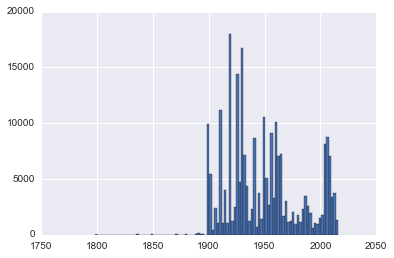

In [28]:
plt.hist(df['YEAR BUILT'], bins=100)
plt.show()

In [29]:
df['BuildingAge'] = 2016 - df['YEAR BUILT']

Now let's deal with YearAlter1 and YearAlter2

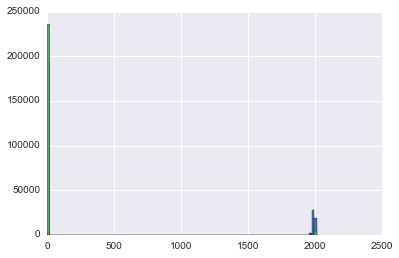

In [30]:
plt.hist(df['YearAlter1'], bins=100)
plt.hist(df['YearAlter2'], bins=100)
plt.show()

In [31]:
df['NumRecordedAltered'] = (df['YearAlter1'] != 0).map({True:1, False:0})+ (df['YearAlter2'] != 0).map({True:1, False:0})
df['NumRecordedAltered'].value_counts()

0    192884
1     43025
2      5369
Name: NumRecordedAltered, dtype: int64

In [32]:
df['YearsSinceLastRecordedAlter'] = 2016 - np.max(df[['YearAlter1','YearAlter2','YEAR BUILT']], axis=1)

In [33]:
df['YearsSinceLastRecordedAlter'].value_counts()

96.0     13999
86.0     11663
91.0     10061
66.0      7834
106.0     7444
9.0       6540
56.0      6357
76.0      6148
11.0      5599
28.0      5594
8.0       5569
29.0      5495
10.0      5335
61.0      4983
30.0      4807
117.0     4682
85.0      4562
115.0     4364
31.0      3958
51.0      3870
81.0      3863
27.0      3753
7.0       3609
4.0       3511
3.0       3467
5.0       3289
12.0      3247
71.0      3085
53.0      3073
101.0     2782
         ...  
130.0        3
122.0        3
124.0        3
125.0        3
176.0        3
181.0        2
127.0        2
174.0        2
164.0        2
192.0        2
170.0        2
178.0        1
182.0        1
175.0        1
173.0        1
171.0        1
184.0        1
212.0        1
169.0        1
165.0        1
161.0        1
159.0        1
158.0        1
151.0        1
149.0        1
147.0        1
144.0        1
141.0        1
139.0        1
160.0        1
Name: YearsSinceLastRecordedAlter, dtype: int64

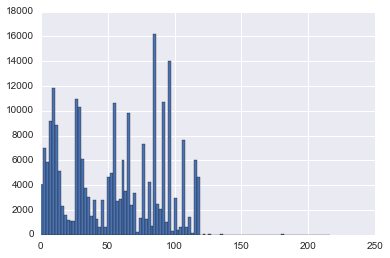

In [34]:
plt.hist(df['YearsSinceLastRecordedAlter'], bins=100)
plt.show()

In [35]:
df.drop(['YEAR BUILT','YearAlter1','YearAlter2'], axis=1, inplace=True)
df.shape

(241278, 40)

We proceed up through the columns- before proceeding, lets look at the df summary:

In [36]:
df.describe()

/Users/benjaminjakubowski/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,AssessLand,AssessTot,BLOCK,BOROUGH,BldgArea,Block,COMMERCIAL UNITS,CT2010,CondoNo,GROSS SQUARE FEET,LAND SQUARE FEET,LOT,Lot,LotArea,NumBldgs,NumFloors,Pluto_BBL,PolicePrct,RESIDENTIAL UNITS,ResArea,SALE PRICE,SchoolDist,TAX CLASS AT TIME OF SALE,TOTAL UNITS,ZIP CODE,unit_BBL,BuildingAge,NumRecordedAltered,YearsSinceLastRecordedAlter
count,2.412780e+05,2.412780e+05,241278.000000,241278.000000,2.412780e+05,241278.000000,241278.000000,241277.000000,241278.000000,2.412780e+05,2.412780e+05,241278.000000,241278.000000,2.412780e+05,241278.000000,241278.000000,2.412780e+05,241241.000000,241278.000000,2.412780e+05,2.412780e+05,241241.000000,241278.000000,241278.000000,241278.000000,2.412780e+05,241278.000000,241278.000000,241278.000000
mean,1.654901e+06,8.698415e+06,3904.019098,2.806012,1.358958e+05,3904.019098,0.047584,379.884969,317.420018,1.953244e+03,1.608034e+03,358.735430,1799.654701,4.196367e+04,3.431627,8.083114,2.845054e+09,69.388425,2.085627,1.019788e+05,1.068565e+06,16.714236,1.561531,2.132739,10798.686059,2.845053e+09,66.878505,0.222826,54.932327
std,6.309005e+06,2.262752e+07,3487.897723,1.342294,1.050162e+06,3487.897723,0.382697,365.493791,740.993471,2.819449e+04,9.074748e+03,660.729767,3154.394349,2.443311e+05,14.456552,9.969581,1.359532e+09,39.538028,32.236754,2.474517e+05,1.151212e+07,10.775055,0.496201,32.374365,589.638925,1.359533e+09,33.260419,0.466562,35.148949
min,0.000000e+00,0.000000e+00,1.000000,1.000000,0.000000e+00,1.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000,1.000078e+09,1.000000,0.000000,0.000000e+00,4.550000e+04,1.000000,1.000000,0.000000,0.000000,1.000071e+09,0.000000,0.000000,0.000000
25%,9.649000e+03,2.794500e+04,1215.000000,1.000000,2.025000e+03,1215.000000,0.000000,NaN,0.000000,0.000000e+00,0.000000e+00,20.000000,20.000000,2.500000e+03,1.000000,2.000000,1.016008e+09,NaN,0.000000,1.927000e+03,3.194100e+05,NaN,1.000000,0.000000,10065.000000,1.016001e+09,48.000000,0.000000,26.000000
50%,7.483900e+04,5.531220e+05,2453.000000,3.000000,1.093600e+04,2453.000000,0.000000,NaN,0.000000,0.000000e+00,0.000000e+00,47.000000,47.000000,5.021000e+03,1.000000,4.000000,3.046500e+09,NaN,1.000000,9.695000e+03,5.140000e+05,NaN,2.000000,1.000000,11206.000000,3.046500e+09,71.000000,0.000000,56.000000
75%,1.062000e+06,7.027189e+06,5906.000000,4.000000,1.210720e+05,5906.000000,0.000000,NaN,0.000000,1.998000e+03,2.500000e+03,350.000000,353.000000,1.998200e+04,1.000000,9.000000,4.050230e+09,NaN,2.000000,1.146000e+05,8.604210e+05,NaN,2.000000,2.000000,11356.000000,4.050230e+09,91.000000,0.000000,86.000000
max,1.345064e+08,9.069332e+08,16322.000000,5.000000,4.954783e+07,16322.000000,46.000000,1621.000000,9566.000000,8.942176e+06,2.675000e+06,9112.000000,9008.000000,4.231466e+06,417.000000,119.000000,5.080500e+09,123.000000,8759.000000,8.367942e+06,4.111112e+09,32.000000,2.000000,8805.000000,11694.000000,5.080500e+09,218.000000,2.000000,216.000000


First thing I notice is zip code = 0. This indicates a misentered value:

In [37]:
df.loc[df['ZIP CODE']==0,:].shape

(2, 40)

It looks like this only occurs twice- let's drop those rows.

In [38]:
df = df.loc[~(df['ZIP CODE']==0),:]
df.shape

(241276, 40)

Let's continue this cleaning:

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241276 entries, 0 to 256196
Data columns (total 40 columns):
ADDRESS                           241276 non-null object
APARTMENT NUMBER                  241276 non-null object
Address                           241276 non-null object
AssessLand                        241276 non-null float64
AssessTot                         241276 non-null float64
BLOCK                             241276 non-null int64
BOROUGH                           241276 non-null int64
BUILDING CLASS AT PRESENT         241276 non-null object
BUILDING CLASS AT TIME OF SALE    241276 non-null object
BUILDING CLASS CATEGORY           241276 non-null object
BldgArea                          241276 non-null float64
Block                             241276 non-null float64
Borough                           241276 non-null object
COMMERCIAL UNITS                  241276 non-null int64
CT2010                            241275 non-null float64
CondoNo                         

Note at this point there are only 38 records with missing values, out of 241k records- these records are dropped since they represent a trivial subset of the data.

In [40]:
df = df.dropna(axis=0, how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241238 entries, 0 to 256196
Data columns (total 40 columns):
ADDRESS                           241238 non-null object
APARTMENT NUMBER                  241238 non-null object
Address                           241238 non-null object
AssessLand                        241238 non-null float64
AssessTot                         241238 non-null float64
BLOCK                             241238 non-null int64
BOROUGH                           241238 non-null int64
BUILDING CLASS AT PRESENT         241238 non-null object
BUILDING CLASS AT TIME OF SALE    241238 non-null object
BUILDING CLASS CATEGORY           241238 non-null object
BldgArea                          241238 non-null float64
Block                             241238 non-null float64
Borough                           241238 non-null object
COMMERCIAL UNITS                  241238 non-null int64
CT2010                            241238 non-null float64
CondoNo                         

Next, we drop the feature "EASEMENT" and 'CondoNo':

In [41]:
df.drop(['EASE-MENT','CondoNo'], axis=1, inplace=True)

In [42]:
df.describe()

,AssessLand,AssessTot,BLOCK,BOROUGH,BldgArea,Block,COMMERCIAL UNITS,CT2010,GROSS SQUARE FEET,LAND SQUARE FEET,LOT,Lot,LotArea,NumBldgs,NumFloors,Pluto_BBL,PolicePrct,RESIDENTIAL UNITS,ResArea,SALE PRICE,SchoolDist,TAX CLASS AT TIME OF SALE,TOTAL UNITS,ZIP CODE,unit_BBL,BuildingAge,NumRecordedAltered,YearsSinceLastRecordedAlter
count,2.412380e+05,2.412380e+05,241238.000000,241238.000000,2.412380e+05,241238.000000,241238.000000,241238.000000,2.412380e+05,2.412380e+05,241238.000000,241238.000000,2.412380e+05,241238.000000,241238.000000,2.412380e+05,241238.000000,241238.000000,2.412380e+05,2.412380e+05,241238.000000,241238.000000,241238.000000,241238.000000,2.412380e+05,241238.000000,241238.000000,241238.000000
mean,1.655144e+06,8.699634e+06,3903.536963,2.805665,1.359029e+05,3903.536963,0.047592,379.913049,1.953558e+03,1.608265e+03,358.631882,1798.801412,4.193631e+04,3.415619,8.084127,2.844702e+09,69.388144,2.085807,1.019803e+05,1.068696e+06,16.714174,1.561624,2.132927,10798.848361,2.844701e+09,66.884322,0.222863,54.936163
std,6.309500e+06,2.262920e+07,3487.958464,1.342119,1.050249e+06,3487.958464,0.382728,365.516642,2.819681e+04,9.075478e+03,660.727511,3153.859744,2.443409e+05,14.399623,9.970096,1.359355e+09,39.538018,32.239423,2.474719e+05,1.151307e+07,10.775051,0.496189,32.377045,588.835133,1.359356e+09,33.260020,0.466592,35.150517
min,0.000000e+00,0.000000e+00,1.000000,1.000000,0.000000e+00,1.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000,1.000078e+09,1.000000,0.000000,0.000000e+00,4.550000e+04,1.000000,1.000000,0.000000,10001.000000,1.000071e+09,0.000000,0.000000,0.000000
25%,9.648000e+03,2.794500e+04,1215.000000,1.000000,2.025000e+03,1215.000000,0.000000,126.000000,0.000000e+00,0.000000e+00,20.000000,20.000000,2.500000e+03,1.000000,2.000000,1.016008e+09,24.000000,0.000000,1.926000e+03,3.197652e+05,3.000000,1.000000,0.000000,10065.000000,1.016001e+09,48.000000,0.000000,26.000000
50%,7.470000e+04,5.525000e+05,2452.000000,3.000000,1.091700e+04,2452.000000,0.000000,232.000000,0.000000e+00,0.000000e+00,47.000000,47.000000,5.020000e+03,1.000000,4.000000,3.046450e+09,75.000000,1.000000,9.682000e+03,5.140000e+05,19.000000,2.000000,1.000000,11206.000000,3.046450e+09,71.000000,0.000000,56.000000
75%,1.062000e+06,7.027650e+06,5906.000000,4.000000,1.210720e+05,5906.000000,0.000000,548.000000,1.998000e+03,2.500000e+03,350.000000,350.000000,1.998000e+04,1.000000,9.000000,4.050230e+09,108.000000,2.000000,1.146000e+05,8.608750e+05,27.000000,2.000000,2.000000,11356.000000,4.050230e+09,91.000000,0.000000,86.000000
max,1.345064e+08,9.069332e+08,16322.000000,5.000000,4.954783e+07,16322.000000,46.000000,1621.000000,8.942176e+06,2.675000e+06,9112.000000,9008.000000,4.231466e+06,417.000000,119.000000,5.080500e+09,123.000000,8759.000000,8.367942e+06,4.111112e+09,32.000000,2.000000,8805.000000,11694.000000,5.080500e+09,218.000000,2.000000,216.000000


In [43]:
summ = df.describe()

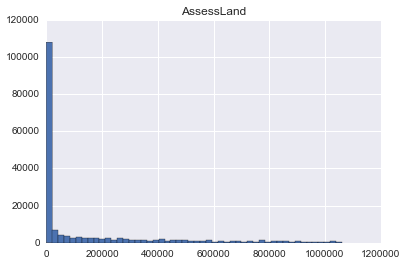

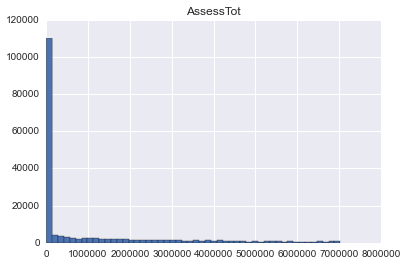

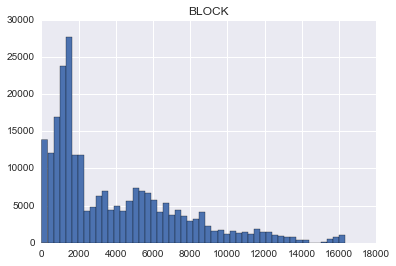

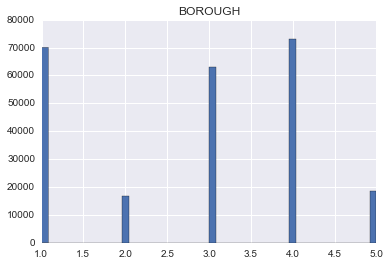

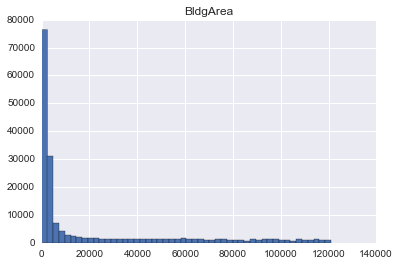

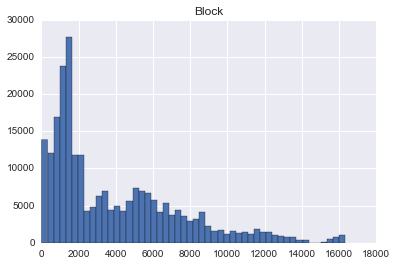

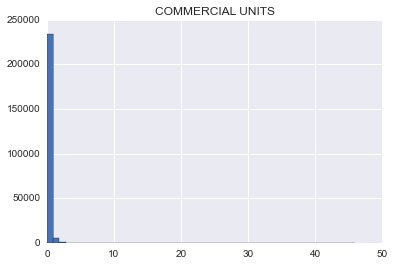

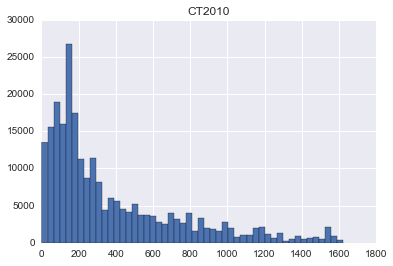

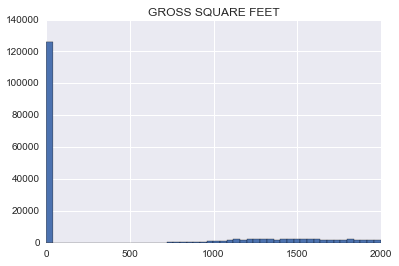

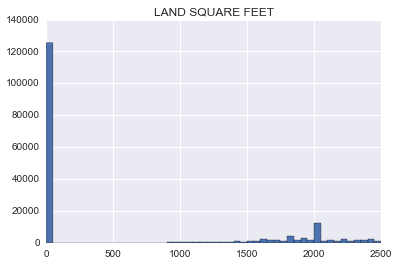

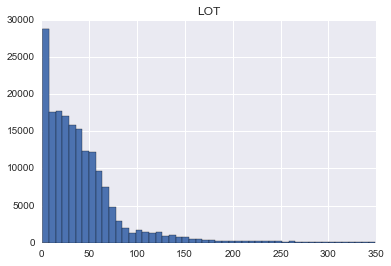

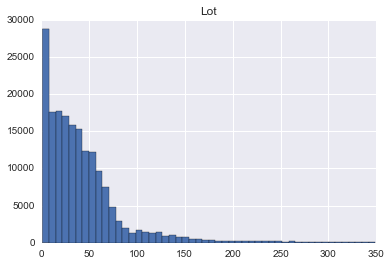

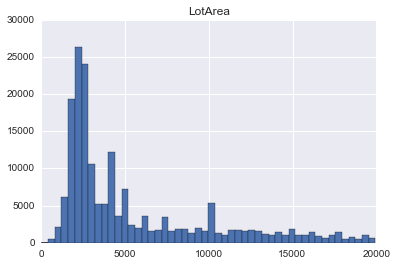

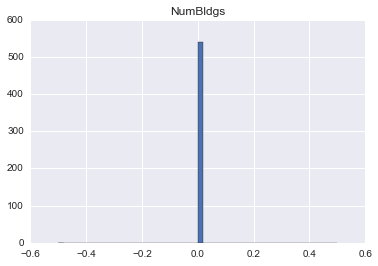

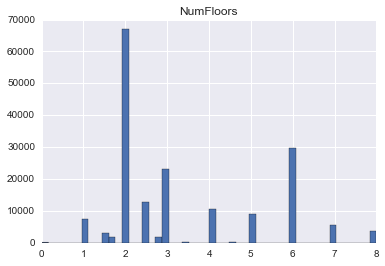

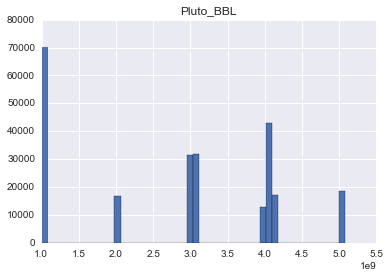

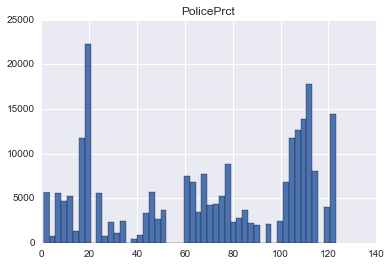

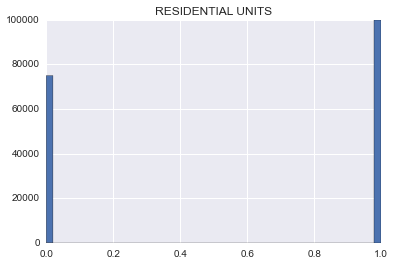

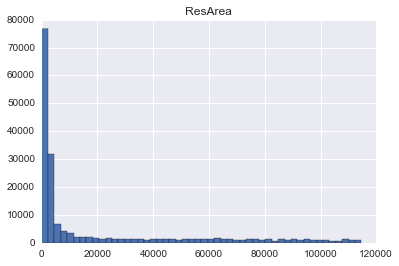

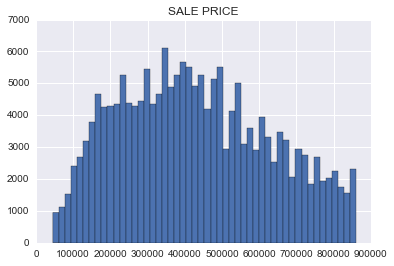

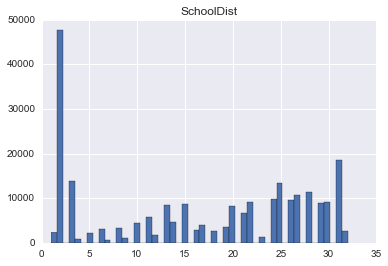

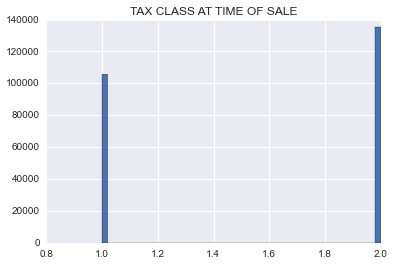

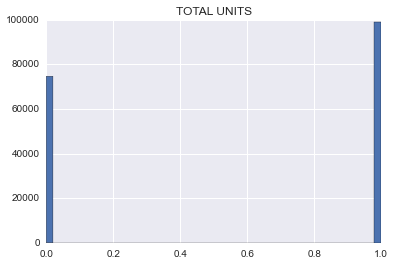

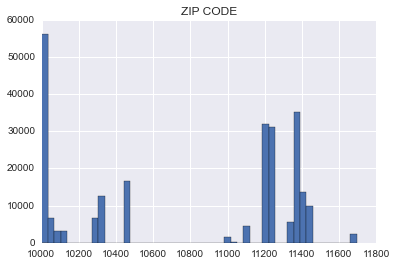

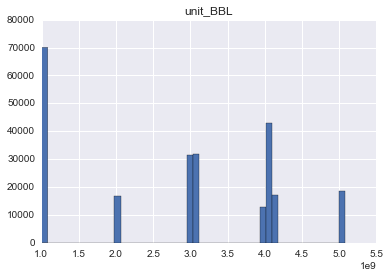

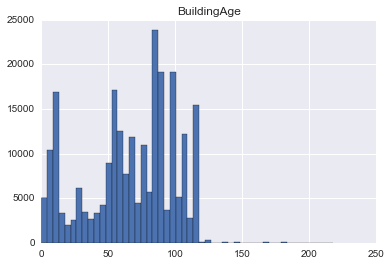

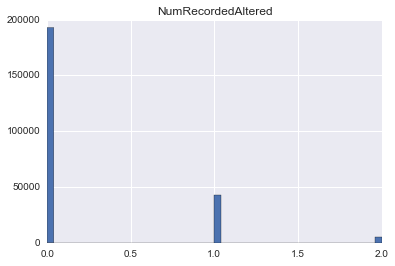

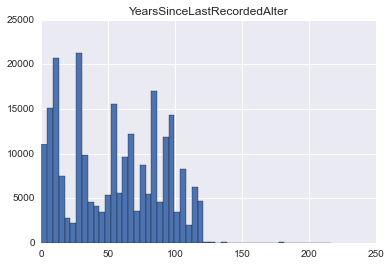

In [44]:
for column in summ.columns:
    if summ.loc['75%',column] > 0: #handle commercial units
        diff = summ.loc['max',column] / summ.loc['75%',column]
    else:
        diff = 1
    if diff > 10:
        plt.hist(df.loc[df[column] < summ.loc['75%',column],column].values,bins=50)
    else:
        plt.hist(df[column],bins=50)
    plt.title(column)
    plt.show()

In [45]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

fuzz.ratio(df.loc[0,'ADDRESS'], df.loc[0,'Address'])

/Users/benjaminjakubowski/anaconda/lib/python2.7/site-packages/fuzzywuzzy/fuzz.py:35: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


63

In [46]:
df.loc[0,'ADDRESS']

'350 BEACH 40TH STREET                    '

In [47]:
df.loc[0,'Address']

'350 BEACH 40 STREET'

In [48]:
df['ADDRESS'] = df['ADDRESS'].str.replace(r'\s+',' ').str.lower()

In [49]:
df['Address'] = df['Address'].str.replace(r'\s+',' ').str.lower()

In [50]:
fuzz.ratio(df.loc[0,'ADDRESS'], df.loc[0,'Address'])

93

In [51]:
df.loc[0,'ADDRESS']

'350 beach 40th street '

In [52]:
df.loc[0,'Address']

'350 beach 40 street'

In [53]:
df['Address_match'] = df.apply(lambda row: fuzz.ratio(row['ADDRESS'], row['Address']), axis=1)

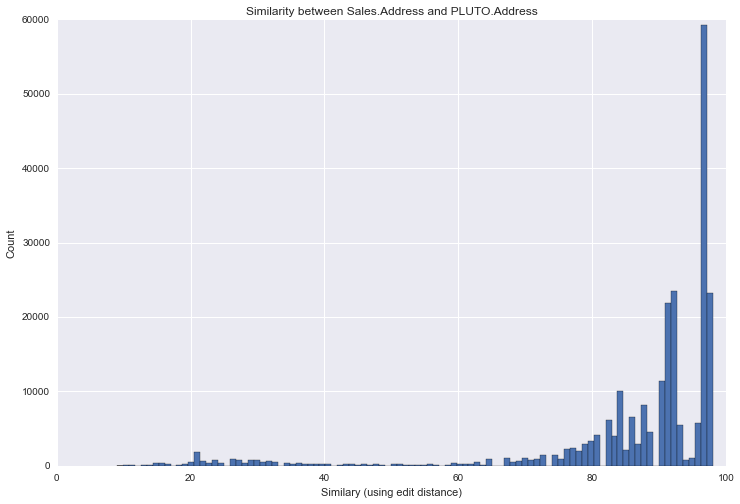

In [54]:
plt.figure(figsize=(12,8))
plt.hist(df['Address_match'], bins=100)
plt.title('Similarity between Sales.Address and PLUTO.Address')
plt.ylabel('Count')
plt.xlabel("Similary (using edit distance)")
plt.show()

In [55]:
sample = np.random.choice(df.index, 10)

In [56]:
df.loc[sample, ['Address_match','ADDRESS','Address']].sort_values('Address_match')

,Address_match,ADDRESS,Address
217810,21,1585 odell street,14 metropolitan oval
50236,22,"245 east 54 street, 24p",1035 2 avenue
153868,91,162-25 96th street,162-25 96 street
106708,96,117 noel road,117 noel road
56647,97,2128 70 street,2128 70 street
112518,97,70-50 broadway,70-50 broadway
186644,97,2622 mill avenue,2622 mill avenue
199287,97,58 strong place,58 strong place
143558,97,50 clear water road,50 clear water road
164741,98,1364 bronx river avenue,1364 bronx river avenue


In [396]:
def address_to_list(address):
    return filter(None, str(address).strip().split(' '))

def is_int(s):
    try:
        int(s)
        return True
    except ValueError:
        return False
    
def street_num_and_name(address):
    address_list = address_to_list(address)
    if len(address_list)==0:
        return np.nan
    else: #Some info in address field
        if is_int(address_list[0].split('-')[0]): #note need to split on '-' for queens addresses
            street_name = ' '.join(address_list[1:])
            street_name_list = street_name.split(',')
            if len(street_name_list) == 1:
                unit_nums = np.nan
            elif len(street_name_list) >= 2:
                street_name = street_name_list[0]
                unit_nums = street_name_list[1:]
            else:
                print address
                raise ValueError
            return address_list[0], street_name, unit_nums
        else:
            return np.nan, ' '.join(address_list), np.nan
        
def split_df_address(df, colname):
    features = ['Street number','Street name', 'Unit number']
    if colname.isupper():
        features = [x.upper() for x in features]
    df[colname] = df[colname].apply(street_num_and_name)
    df[features] = df[colname].apply(pd.Series)